# Setup

In [3]:
from collections import Counter
import copy
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.calibration import CalibratedClassifierCV, calibration_curve, IsotonicRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import statsmodels.formula.api as smf
import xgboost as xgb

In [4]:
from ml_func import analyze_accuracy, get_predictions, plot_calibration
from ml_func import setup_chess_data

In [5]:
X_train, X_test, y_train, y_test = setup_chess_data()

# Train and Predict

In [6]:
test_obs = list(X_train.iloc[0, :].values)

In [7]:
params = {'booster': 'gbtree', 'eval_metric': 'logloss', 'max_depth': 3,
          'gamma': 0.1, 'colsample_bytree': 1, 'subsample': 1, 'min_child_weight': 3, 'n_jobs': -1,
         'objective': 'binary:logistic'}
xgb_matrix = xgb.DMatrix(X_train, label=y_train)
booster = xgb.train(params=params, dtrain=xgb_matrix, num_boost_round=100)

In [8]:
temp = xgb.DMatrix(np.array([test_obs]), feature_names = X_train.columns)
test = booster.predict(temp)
print(test)

[0.99814034]


In [9]:
preds = booster.predict(xgb.DMatrix(X_test))
for x in range(20):
    print('Actual', y_test.values[x], 'Prediction', preds[x])

Actual 1.0 Prediction 0.99846613
Actual 1.0 Prediction 0.7642213
Actual 1.0 Prediction 0.9997167
Actual 1.0 Prediction 0.99910516
Actual 1.0 Prediction 0.99709964
Actual 0.0 Prediction 0.18769038
Actual 1.0 Prediction 0.99842584
Actual 1.0 Prediction 0.9143439
Actual 1.0 Prediction 0.9215073
Actual 1.0 Prediction 0.99781775
Actual 1.0 Prediction 0.9979882
Actual 1.0 Prediction 0.99657094
Actual 1.0 Prediction 0.9535337
Actual 1.0 Prediction 0.9501249
Actual 1.0 Prediction 0.9795711
Actual 1.0 Prediction 0.94892275
Actual 1.0 Prediction 0.9912723
Actual 1.0 Prediction 0.9996569
Actual 1.0 Prediction 0.99218595
Actual 1.0 Prediction 0.9999126


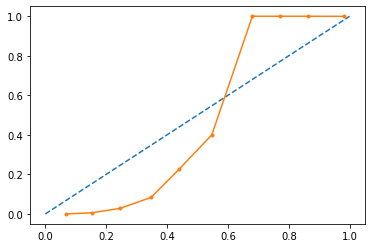

In [10]:
plot_calibration(y_test, preds)

In [11]:
#test = smf.logit()
prediction_df = pd.DataFrame(data = {'actual': y_test, 'pred': preds})
logit = smf.logit(data = prediction_df, formula = 'actual ~ pred').fit()
print(logit.summary())

Optimization terminated successfully.
         Current function value: 0.018245
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:                 actual   No. Observations:                 5612
Model:                          Logit   Df Residuals:                     5610
Method:                           MLE   Df Model:                            1
Date:                Tue, 14 Sep 2021   Pseudo R-squ.:                  0.9437
Time:                        17:35:17   Log-Likelihood:                -102.39
converged:                       True   LL-Null:                       -1819.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -11.3050      0.682    -16.572      0.000     -12.642      -9.968
pred          19.7187      1

In [12]:
new_df = pd.DataFrame(data = {'Intercept' : preds, 'pred':preds})
new_df['Intercept'] = 1
new_values = logit.predict(new_df)

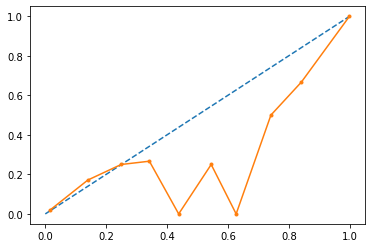

In [13]:
plot_calibration(y_test, new_values)